## TECHIN 513 HW1 – Modifying Signals

Daithy Ren

(This should be a markup cell, which means that when you run it you just get formated text.)

In [17]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import decimal
import scipy.signal
from scipy.io import wavfile
from scipy.interpolate import interp1d
import simpleaudio as sa
from scipy.signal import resample

# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week hw.  You should plan on completing the first 2 assignments in the first week.

## HW 1 turn in checklist

•	your Jupyter or Colab notbooks (uploaded as .pdf with your outputs).

Note: You can work together but you need to submit your own work. do not copy paste from each other


## Assignment 1 -- Working with sound files

In [18]:
# Assignment 1 - Time Scaling Function

# Part A

# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t


In [20]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part B
# TODO: Code that solves B

file_path = '/Users/daithyren/Desktop/sounds/train.wav'

# Reading the audio file
fs1, x1 = wavfile.read(file_path)

# Printing the sampling rate and the shape of the audio data
print("Sampling rate:", fs1, "Hz")
print("Shape of audio data:", x1.shape)


# Part C
# TODO: Code that solves C



# # Original audio data and sampling frequency
# fs1, x1 = wavfile.read('/Users/daithyren/Desktop/sounds/train.wav')

# # New sampling frequencies
# fs2 = int(fs1 / 2)  # 16 kHz
# fs3 = int(1.5 * fs1)  # 1.5 times the original rate

# # Function to resample audio
# def resample_audio(x, fs1, fs_new):
#     # Time points for original audio
#     t_original = np.arange(len(x)) / fs1
#     # Time points for new audio
#     t_new = np.arange(0, t_original[-1], 1/fs_new)
#     # Interpolate
#     interpolator = interp1d(t_original, x, kind='linear', axis=0)
#     return interpolator(t_new)

# # Resample audio for new sampling frequencies
# x2 = resample_audio(x1, fs1, fs2)
# x3 = resample_audio(x1, fs1, fs3)

# # Write the new audio files
# wavfile.write('train_fs2.wav', fs2, x2.astype(np.int16))
# wavfile.write('train_fs3.wav', fs3, x3.astype(np.int16))


fs1, x1 = wavfile.read('/Users/daithyren/Desktop/sounds/train.wav')
num_samples = len(x1)

# New sampling frequencies
fs2 = int(fs1 / 2)  # 16 kHz
fs3 = int(1.5 * fs1)  # 48 kHz

# Calculate the number of samples for the new sampling rates
num_samples_fs2 = int((num_samples * fs2) / fs1)
num_samples_fs3 = int((num_samples * fs3) / fs1)

# Resample the audio
x2 = resample(x1, num_samples_fs2)
x3 = resample(x1, num_samples_fs3)

# Write the new audio files
wavfile.write('train_fs2.wav', fs2, x2.astype(np.int16))
wavfile.write('train_fs3.wav', fs3, x3.astype(np.int16))

# Part D
# TODO: Code that solves D


def play_audio(file_path):
    # Read the audio file
    fs, audio = wavfile.read(file_path)
    
    # Create a WaveObject from an audio file
    wave_obj = sa.WaveObject.from_wave_file(file_path)

    # Play audio
    play_obj = wave_obj.play()
    play_obj.wait_done()  # Wait until sound has finished playing

# Paths to the audio files
original_file = '/Users/daithyren/Desktop/sounds/train.wav'
fs2_file = 'train_fs2.wav'
fs3_file = 'train_fs3.wav'

# Play the original and the modified audio files
print("Playing original audio...")
# print("Sampling rate:", fs1, "Hz")
play_audio(original_file)

print("Playing audio with fs2...")
# print("Sampling rate:", fs2, "Hz")
play_audio(fs2_file)

print("Playing audio with fs3...")
# print("Sampling rate:", fs3, "Hz")
play_audio(fs3_file)


Sampling rate: 32000 Hz
Shape of audio data: (50313,)
Playing original audio...
Sampling rate: 32000 Hz
Playing audio with fs2...
Sampling rate: 16000 Hz
Playing audio with fs3...
Sampling rate: 48000 Hz


###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.

Pitch Shift: Higher playback frequency increases pitch; lower decreases it.

Speed Alteration: Audio plays faster with higher frequency, slower with lower.

Distortion: Incorrect frequency can cause unnatural sound and artifacts.

Loss of Detail: Low playback frequency may miss high-frequency sounds.

Compatibility Issues: Some systems may not properly handle unusual frequencies.

## Assignment 2 -- Amplitude Operations on Signals

In [23]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# TODO: Code that solves A
# Start with a comment section that explains what the input variables are

n0 = int(0.5 * fs1)  # Assuming fs1 is the sampling rate of x1
s1 = np.concatenate((np.ones(n0), 0.2 * np.ones(len(x1) - n0)))
v1 = x1 * s1
wavfile.write('v1.wav', fs1, v1.astype(np.int16))


In [24]:
# Assignment 2 - Title of Assignment 2

# Part B
# TODO: Code that solves B
r1 = np.linspace(1, 0, len(x1))
v2 = x1 * r1
wavfile.write('v2.wav', fs1, v2.astype(np.int16))


# Part C
# TODO: Code that solves C
def play_audio_from_file(file_path):
    wave_obj = sa.WaveObject.from_wave_file(file_path)
    play_obj = wave_obj.play()
    play_obj.wait_done()

# Play the original, v1, and v2
play_audio_from_file('/Users/daithyren/Desktop/sounds/train.wav')  # Replace with actual path
play_audio_from_file('v1.wav')
play_audio_from_file('v2.wav')


###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range? If you wanted a smooth but faster decay in amplitude, what signal might you use?  

1. Differences from Modifications:
Modification with s1 (Creating v1):
s1 is defined to have a value of 1 for t=[0, 0.5] and 0.2 for t>0.5.
The effect is a sudden drop in volume after the first half-second.
Modification with r1 (Creating v2):
r1 is a linearly decaying ramp signal, starting at 1 and decreasing to 0.
The effect is a smooth and gradual reduction in volume throughout the duration of the signal.

2. Hypothetical Modification with s1 Value of 2:
If s1 were defined to take the value of 2 for the [0, 0.5] range:
The amplitude of the signal during the first half-second would be doubled. This would make the initial part of the signal louder.

3. Creating a Smooth but Faster Decay:
For a smooth but faster decay in amplitude:
We can use an exponentially decaying signal.


## Assignment 3 -- Time Scaling Audio Signals 

<IPython.core.display.Javascript object>


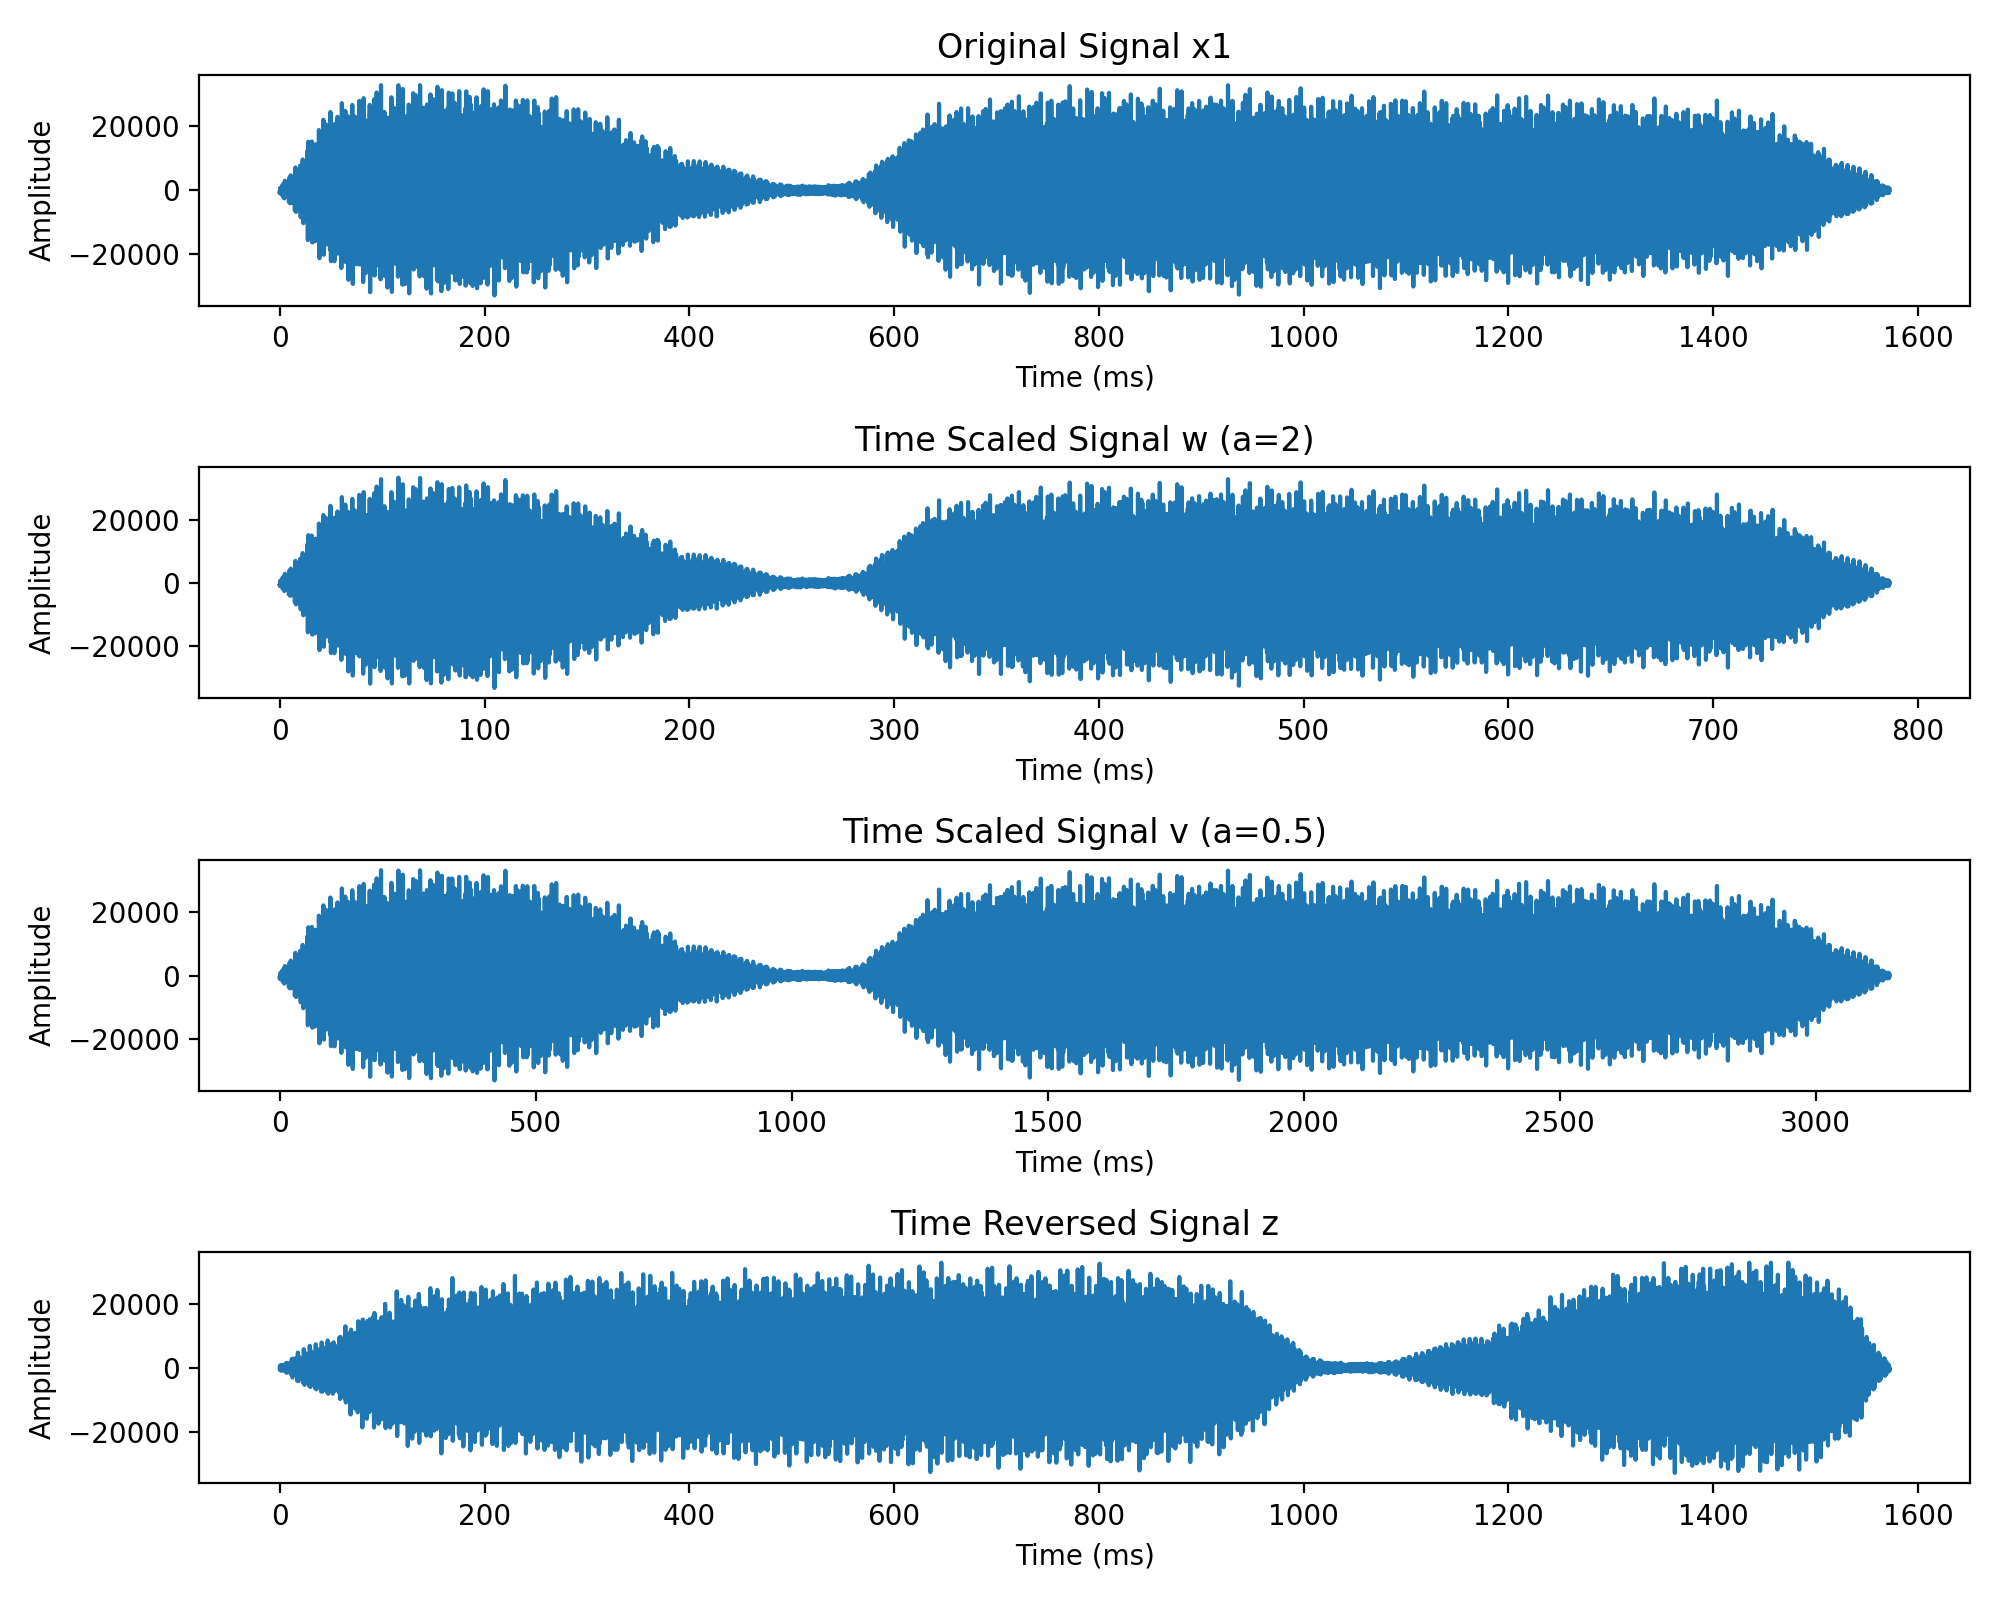

In [35]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A
def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = scipy.signal.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

# Part B
# TODO: Code that solves B
w, t_w = timescale(x1, fs1, 2)

v, t_v = timescale(x1, fs1, 0.5)

z = np.ascontiguousarray(x1[::-1])
t_x1 = np.arange(len(x1)) / fs1
t_z = t_x1  # Assuming t_x1 is the time vector for x1

wavfile.write('z_reversed.wav', fs1, z.astype(np.int16))


def play_audio(audio_data, fs):
    # Ensure the audio data is in the correct format
    audio_data = np.int16(audio_data / np.max(np.abs(audio_data)) * 32767)

    # Create a WaveObject from the audio data
    wave_obj = sa.WaveObject(audio_data, 1, 2, fs)

    # Play audio
    play_obj = wave_obj.play()
    play_obj.wait_done()  # Wait until the audio has finished playing

# Play w, v, and z
play_audio(w, fs1)  # Assuming fs1 is the sampling rate for w
play_audio(v, fs1)  # Assuming fs1 is the sampling rate for v
play_audio(z, fs1)  # Assuming fs1 is the sampling rate for z


# Part C
# TODO: Code that solves C
import matplotlib.pyplot as plt

# Create a figure and 4x1 subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

# Plot x1
axs[0].plot(t_x1 * 1000, x1)
axs[0].set_title('Original Signal x1')
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Amplitude')

# Plot w
axs[1].plot(t_w * 1000, w)
axs[1].set_title('Time Scaled Signal w (a=2)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Amplitude')

# Plot v
axs[2].plot(t_v * 1000, v)
axs[2].set_title('Time Scaled Signal v (a=0.5)')
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Amplitude')

# Plot z
axs[3].plot(t_x1 * 1000, z)
axs[3].set_title('Time Reversed Signal z')
axs[3].set_xlabel('Time (ms)')
axs[3].set_ylabel('Amplitude')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

# Part D
# TODO: Code that solves D
print("Playing original audio (x1)...")
play_audio(x1, fs1)

print("Playing time-scaled audio (w) with a=2...")
play_audio(w, fs1)  

print("Playing time-scaled audio (v) with a=0.5...")
play_audio(v, fs1)  

print("Playing time-reversed audio (z)...")
play_audio(z, fs1)

###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?


Separate Figures for Each Subplot: Instead of creating a single figure with multiple subplots, we have multiple figures, each containing a single subplot.
Multiple Windows: When the script is run, and the plots are displayed each subplot will appear in its own window or tab.
No Combined Layout Adjustments: Since each subplot is in its own figure, they won't be adjusted relative to each other.
Independent Axes and Titles: Each subplot will have its own independent axes and titles, but this would be the same as with a single figure containing multiple subplots.

## Assignment 4 -- Time Shift Operations

In [36]:
# Part A
# TODO: Code that solves A
def timeshift(x, fs, t0):
    """
    Shifts the signal x in time.
    :param x: Input signal.
    :param fs: Sampling frequency in Hz.
    :param t0: Time shift in seconds.
    :return: (Shifted signal, Corresponding time vector)
    """
    n0 = int(t0 * fs)
    if t0 > 0:  # Time delay
        y = np.concatenate((np.zeros(n0), x))
    elif t0 < 0:  # Time advance
        y = np.concatenate((x[-n0:], np.zeros(-n0)))
    else:  # No shift
        y = x

    # Create corresponding time vector
    t_y = np.arange(0, len(y)) / fs

    return y, t_y

<IPython.core.display.Javascript object>


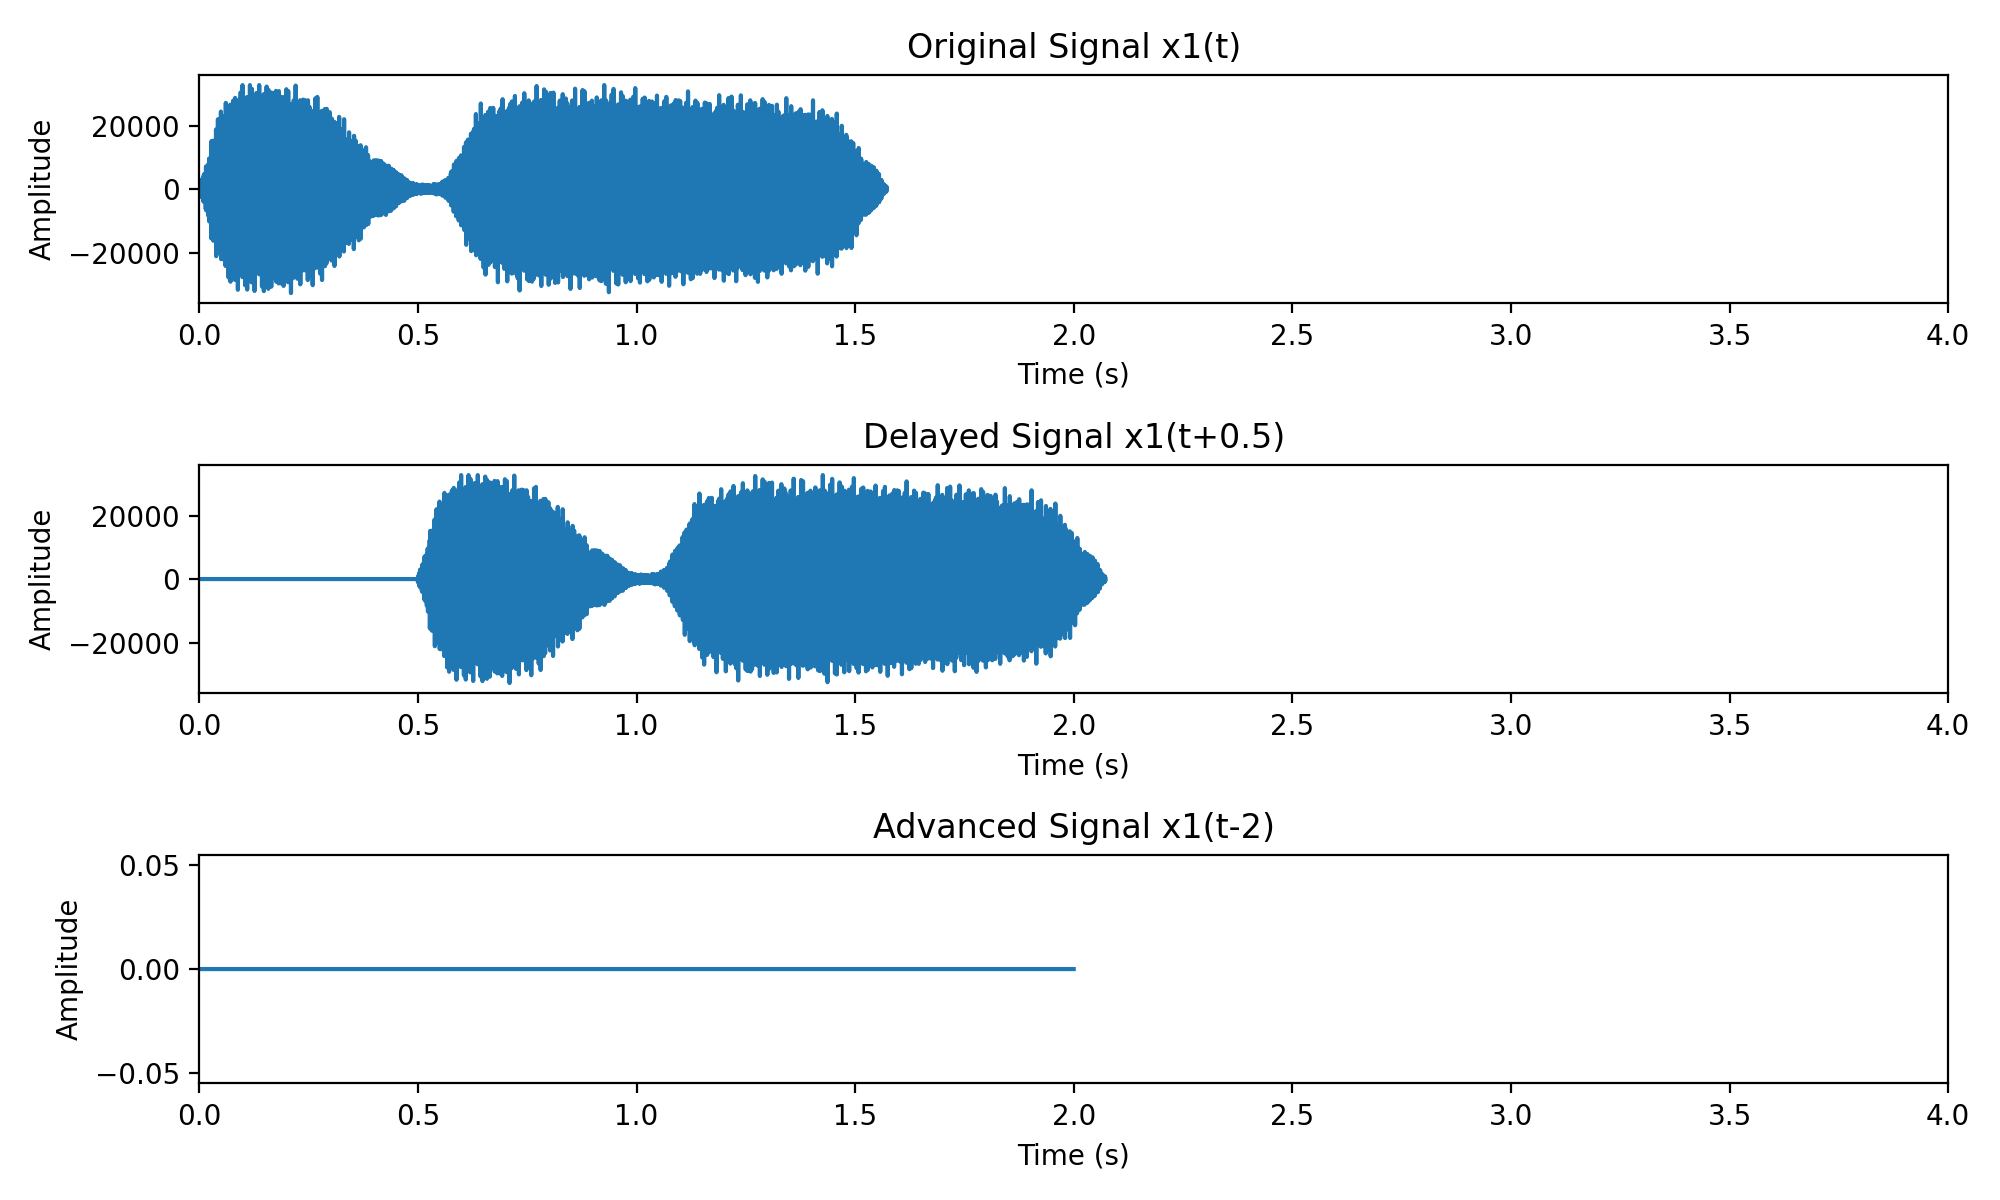

Playing original audio (x1)...
Playing delayed audio (x1 + 0.5s)...
Playing advanced audio (x1 - 2s)...


/Users/daithyren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


In [37]:
# Part B
# TODO: Code that solves B
# Assuming x1 and fs1 are defined
x1_delayed, t1_delayed = timeshift(x1, fs1, 0.5)  # x1(t+0.5)
x1_advanced, t1_advanced = timeshift(x1, fs1, -2)  # x1(t-2)

# Plotting
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t_x1, x1)
plt.title('Original Signal x1(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 4)

# Delayed signal
plt.subplot(3, 1, 2)
plt.plot(t1_delayed, x1_delayed)
plt.title('Delayed Signal x1(t+0.5)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 4)

# Advanced signal
plt.subplot(3, 1, 3)
plt.plot(t1_advanced, x1_advanced)
plt.title('Advanced Signal x1(t-2)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 4)

plt.tight_layout()
plt.show()


# Part C
# TODO: Code that solves C
# Play original, delayed, and advanced signals
print("Playing original audio (x1)...")
play_audio(x1, fs1)

print("Playing delayed audio (x1 + 0.5s)...")
play_audio(x1_delayed, fs1)

print("Playing advanced audio (x1 - 2s)...")
play_audio(x1_advanced, fs1)


### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

Current Implementation:
If the shift is zero, the current implementation correctly returns the original signal unchanged. 
If the shift is a large advance (e.g., bigger than the original signal length), the current implementation may not provide the desired behavior. In such cases, it will still create a zero vector with the length of the shift and concatenate it to the original signal, resulting in a longer signal with zeros.

Potential Improvement:
To handle cases of a large advance more intuitively, we can modify the implementation to directly return a zero signal if the shift exceeds the length of the original signal. Here's an updated implementation that incorporates this improvement:


In [ ]:
# def timeshift(x, fs, t0):
#     """
#     Shifts the signal x in time.
#     :param x: Input signal.
#     :param fs: Sampling frequency in Hz.
#     :param t0: Time shift in seconds.
#     :return: (Shifted signal, Corresponding time vector)
#     """
#     n0 = int(t0 * fs)
#     if t0 > 0:  # Time delay
#         y = np.concatenate((np.zeros(n0), x))
#     elif t0 < 0:  # Time advance
#         y = np.concatenate((x[-n0:], np.zeros(-n0)))
#     else:  # No shift
#         y = x

#     # Create corresponding time vector
#     t_y = np.arange(0, len(y)) / fs

#     return y, t_y

def timeshift(x, fs, t0):
    """
    Shifts the signal x in time.
    :param x: Input signal.
    :param fs: Sampling frequency in Hz.
    :param t0: Time shift in seconds.
    :return: (Shifted signal, Corresponding time vector)
    """
    # Find the integer shift n0
    n0 = int(t0 * fs)
    
    # Check if the time shift is positive (delay) or negative (advance)
    if t0 > 0:
        # For time delay, create y by concatenating a zero vector with the original signal
        y = np.concatenate((np.zeros(n0), x))
    elif t0 < 0:
        # For time advance, check if the absolute value of n0 exceeds the signal length
        if abs(n0) >= len(x):
            return np.zeros(len(x)), np.arange(0, len(x)) / fs
        else:
            y = x[-n0:]
    else:
        # If the shift is zero, return the original signal
        y = x
    
    # Create corresponding time vector
    t_y = np.arange(0, len(y)) / fs
    
    return y, t_y


